# Assignment-4

This notebook contains the coding questions to test the proficiency in `Object Oriented Programming` in python.

### Date: 10th January, 2026

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the questions in the notebook and save it.
- Rename the file as `Assignment-04-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-04-Dipika_Chopra.ipynb`.
- Upload the solved notebook in your github repo under the folder **Assignment-4**.
- Upload the solved notebook in the google drive location: https://drive.google.com/drive/folders/1G5M6IcgGvx-hrQ2_iq7xp3Vso9tD_dv0?usp=drive_link
<h3><span style="color:red"> Deadline: 31st Jan, 2026 </span></h3>

## Problem-1

Design a system for a library. Include classes for `Book`, `Patron`, and `Library`.

- The `Book` class should have attributes for title, author, ISBN, and a method `is_available()` that returns `True` if the book is not currently checked out and `False` otherwise. It should also have a method `check_out()` that marks the book as checked out and a method `check_in()` that marks it as available.
- The `Patron` class should have attributes for name and patron ID and a method `borrow_book(book)` that associates a book with the patron.
- The `Library` class should have a collection of `Book` objects and `Patron` objects. It should have methods to `add_book(book)`, `add_patron(patron)`, `lend_book(book, patron)`, and `return_book(book)`. The `lend_book` method should only allow a book to be lent if it's available and the patron exists in the library.


Test your implementation.

In [26]:
class Book:
    def __init__(self, title, author, isbn):
        self.title = title
        self.author = author
        self.isbn = isbn
        self.is_checked_out = False  

    def is_available(self):
        #Returns True if the book is not currently checked out        
        if self.is_checked_out:
            return False
        else:
            return True
        
    def check_out(self):
        if self.is_available():
            self.is_checked_out = True
            print("Book checked out successfully")
            return True
        return False
    
    def check_in(self):
        if self.check_out():
            self.is_checked_out = False
            print("Book checked in successfully")
            return True
        return False
    
        def __str__(self):
            return f"'{self.title}' by {self.author} (ISBN: {self.isbn})"

class Patron:
    def __init__(self, name, patron_id):
        self.name = name
        self.patron_id = patron_id
        self.borrowed_books = []
    
    def borrow_book(self, book):
        """Associates a book with the patron."""
        self.borrowed_books.append(book)

    def return_book(self, book):
        """Removes a book from the patron's borrowed list."""
        if book in self.borrowed_books:
            self.borrowed_books.remove(book)
    def __str__(self):
        return f"Patron: {self.name} (ID: {self.patron_id})"
    
class Library:
    def __init__(self):
        self.books = {}  # ISBN -> Book object for fast lookup
        self.patrons = {}  # ID -> Patron object

    def add_book(self, book):
        """Adds a book to the library."""
        self.books[book.isbn] = book

    def add_patron(self, patron):
        """Adds a patron to the library."""
        self.patrons[patron.patron_id] = patron
    def lend_book(self, isbn, patron_id):
        """Lends a book to a patron if available."""
        book = self.books.get(isbn)
        patron = self.patrons.get(patron_id)

        if not book:
            print("Book not found in library.")
            return

        if not patron:
            print("Patron not registered.")
            return

        if book.is_available():
            book.check_out()
            patron.borrow_book(book)
            print(f"Success: {patron.name} borrowed {book.title}.")
        else:
            print(f"Failure: {book.title} is already checked out.")
    def return_book(self, isbn, patron_id):
        """Handles returning a book."""
        book = self.books.get(isbn)
        patron = self.patrons.get(patron_id)

        if not book or not patron:
            print("Invalid book or patron ID.")
            return

        if book in patron.borrowed_books:
            book.check_in()
            patron.return_book(book)
            print(f"Success: {patron.name} returned {book.title}.")
        else:
            print(f"Failure: {patron.name} does not have {book.title} borrowed.")

mylibrary = Library()

book1 = Book("My Book 1", "Author 1", "12345")
book2 = Book("My Book 2", "Author 2", "34567")

mylibrary.add_book (book1) #add books to library
mylibrary.add_book (book2)

patron1 = Patron ("Sarah", "125")
patron2 = Patron ("Alice","130")

mylibrary.add_patron (patron1)
mylibrary.add_patron (patron2)

mylibrary.lend_book("12345", "125")
mylibrary.return_book("12345", "130")
mylibrary.return_book("12345", "125")

#print(f"Book1 Name: {book1.title}")
#print(f"Book1 Author: {book1.author}")
#if book1.is_available():
#    print(f"Book1 Name: {book1.title} is available")
# else:
#     print(f"Book1 Name: {book1.title} is not available")

# if book2.check_out():
#      print(f"Book1 Name: {book1.title} successfully checked out")
# else:
#     print(f"Book1 Name: {book1.title} check out unsuccessful")

# if book1.check_in():
#      print(f"Book1 Name: {book1.title} successfully checked in")
# else:
#     print(f"Book1 Name: {book1.title} check in unsuccessful")
# print(f"Book: {book1.title} check out status: {book1.is_checked_out}")



# print(f"Patron Name: {patron1.name}")
# patron1.borrow_book ("Book 1")
# patron1.borrow_book ("Book 2")
# print(f"Patron Name: {patron1.name}. Borrowed books {patron1.borrowed_books}")
# patron1.return_book ("Book 2")
# print(f"Patron Name: {patron1.name}. Borrowed books {patron1.borrowed_books}")



Book checked out successfully
Success: Sarah borrowed My Book 1.
Failure: Alice does not have My Book 1 borrowed.
Success: Sarah returned My Book 1.


## Problem-2

Create an base class `Shape` with an method `area()` and another method `perimeter()`. Then, create classes `Rectangle` and `Circle` that inherit from `Shape` and implement the `area()` method. The `perimeter()` method in `Shape` should raise a `NotImplementedError`. Implement the `perimeter()` method in `Rectangle` and `Circle`.

Test your implementation.

In [28]:
import math

class Shape:
    """Base class for geometric shapes."""
    def area(self):
        """Calculates the area of the shape."""
        # This method will be overridden by subclasses
        raise NotImplementedError("Subclasses must implement the area() method.")

    def perimeter(self):
        """Calculates the perimeter of the shape."""
        # This method raises an error to ensure subclasses implement their own logic
        raise NotImplementedError("Subclasses must implement the perimeter() method.")

class Rectangle(Shape):
    """Represents a rectangle, inheriting from Shape."""
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def area(self):
        """Calculates the area of the rectangle (width * height)."""
        return self.width * self.height

    def perimeter(self):
        """Calculates the perimeter of the rectangle (2 * (width + height))."""
        return 2 * (self.width + self.height)

class Circle(Shape):
    """Represents a circle, inheriting from Shape."""
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        """Calculates the area of the circle (pi * r^2)."""
        return math.pi * (self.radius ** 2)

    def perimeter(self):
        """Calculates the perimeter (circumference) of the circle (2 * pi * r)."""
        return 2 * math.pi * self.radius

# --- Example Usage ---

# Create instances of the shapes
rectangle = Rectangle(10, 3)
circle = Circle(radius=10)

# Calculate and print the area and perimeter of the rectangle
print(f"Rectangle:")
print(f"  Width: {rectangle.width}, Height: {rectangle.height}")
print(f"  Area: {rectangle.area():.2f}")
print(f"  Perimeter: {rectangle.perimeter():.2f}")


# Calculate and print the area and perimeter of the circle
print(f"Circle:")
print(f"  Radius: {circle.radius}")
print(f"  Area: {circle.area():.2f}")
print(f"  Perimeter: {circle.perimeter():.2f}")





Rectangle:
  Width: 10, Height: 3
  Area: 30.00
  Perimeter: 26.00
Circle:
  Radius: 10
  Area: 314.16
  Perimeter: 62.83


## Problem-3

Design a system to model different types of employees in a company. There should be a base `Employee` class with attributes for `name` and `employee_id`. Create two subclasses: `SalariedEmployee` with an attribute for `monthly_salary` and a method `calculate_paycheck()` that returns the monthly salary, and `HourlyEmployee` with attributes for `hourly_rate` and `hours_worked`, and a `calculate_paycheck()` method that returns the total pay for the week. Demonstrate creating instances of both employee types and calling their `calculate_paycheck()` methods.

Test your implementation.

In [ ]:
# Base Class
class Employee:
    def __init__(self, name, employee_id):
        self.name = name
        self.employee_id = employee_id

# Subclass for Salaried Employees
class SalariedEmployee(Employee):
    def __init__(self, name, employee_id, monthly_salary):
        super().__init__(name, employee_id)
        self.monthly_salary = monthly_salary
        print(f"Employee Name:  {self.name} Employee Id:  {self.employee_id} and monthly salary: {self.monthly_salary}")

    def calculate_paycheck(self):
        return self.monthly_salary

# Subclass for Hourly Employees
class HourlyEmployee(Employee):
    def __init__(self, name, employee_id, hourly_rate, hours_worked):
        super().__init__(name, employee_id)
        self.hourly_rate = hourly_rate
        self.hours_worked = hours_worked
        print(f"Employee Name:  {self.name} Employee Id:  {self.employee_id} and hourly rate: {self.hourly_rate}")

    def calculate_paycheck(self):
        return self.hourly_rate * self.hours_worked

#Test the code
# Creating instances
emp1 = SalariedEmployee("EMP01", "E001", 50000)
emp2 = HourlyEmployee("EMP02", "E001", 30, 40)

# Calling methods and displaying results
print(f"Employee: {emp1.name}, Paycheck: ${emp1.calculate_paycheck():.2f}")
print(f"Employee: {emp2.name}, Paycheck: ${emp2.calculate_paycheck():.2f}")


Employee Name:  EMP01 Employee Id:  E001 and monthly salary: 50000
Employee Name:  EMP02 Employee Id:  E001 and hourly rate: 30
Employee: EMP01, Paycheck: $50000.00
Employee: EMP02, Paycheck: $1200.00


## Problem-4

Design a class `polynomial` of one variable which will have attributes `degree`, a positive integer and `coefficients`, a list of floating point numbers. 
`degree` means the highest power of the variable and `coefficients` are the coefficient of individual terms.

A polynomial of degree `n` has `n+1` coefficients. 

- Example-1:
$$ 3x^4 + 5x^3 + x^2 + 9x + 10 $$
This is a polynomial of degree 4 and coefficients are [3, 5, 1, 9, 10].

- Example-2: (some coefficients could be zero)
$$ 0.7x^3 + 2.5x $$
Here the degree of polynomial is 3 and coefficients are [0.7, 0, 2.5, 0].

A polynomial of degree zero is just a constant value. 

In the `polynomial` class, you need to implement the following methods:
- `evaluate(x)` which will evaluate the polynomial for a given value of the variable x.
- `plot([x1, x2])` this will plot the polynomial for a given range of x1 to x2 of the variable.
- `derivative(x)` This will evaluate the derivative (differentiation) of the polynomial for a given value of the variable x.
- `plot_derivative([x1, x2])` this will plot the derivative of the polynomial for a given range of x1 to x2 of the variable.

The class should have basic checks, such that the number of coefficients provided by the user should be degree + 1 and the degree should be a positive integer. 

Test your implementation. 

Polynomial:    3     2
2 x + 3 x + 5 x + 6
Value at x=2: 44.0
Derivative at x=2: 41.0
Plotting polynomial...


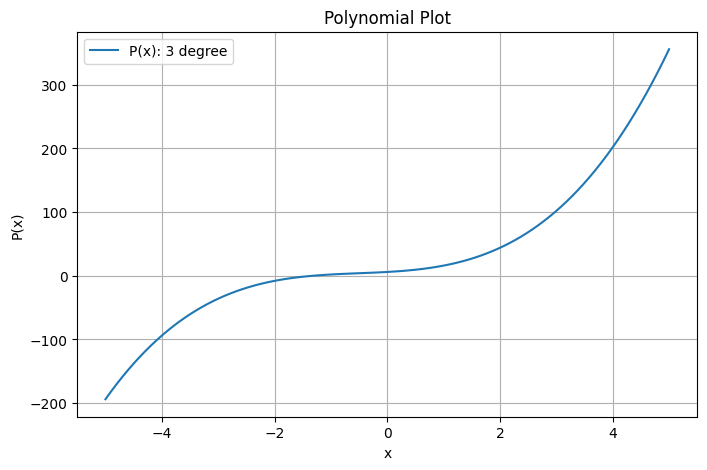

Plotting derivative...


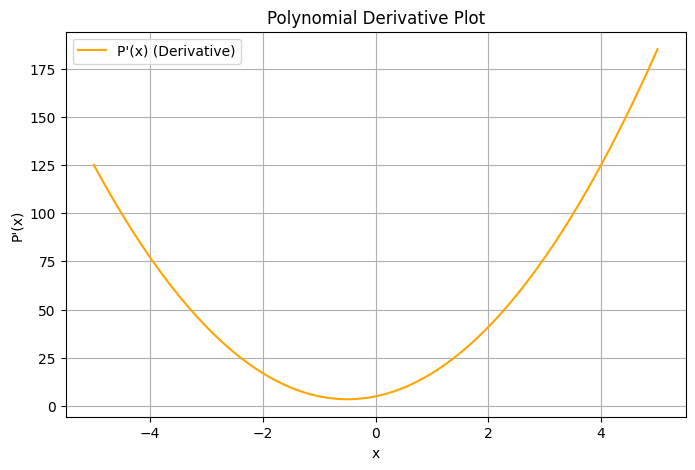

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Polynomial:
    def __init__(self, degree, coefficients):
        """
        Initializes the Polynomial class.
        :param degree: Highest power of the variable (positive integer).
        :param coefficients: List of floats [a_n, a_{n-1}, ..., a_1, a_0]
        """
        # Basic Checks
        if not isinstance(degree, int) or degree < 0:
            raise ValueError("Degree must be a non-negative integer.")
        
        if len(coefficients) != (degree + 1):
            raise ValueError(f"For a degree {degree} polynomial, "
                             f"you must provide exactly {degree + 1} coefficients.")
        
        self.degree = degree
        # Ensure coefficients are floats
        self.coefficients = [float(c) for c in coefficients]
        # Use numpy.poly1d for easy evaluation and differentiation
        self.poly_obj = np.poly1d(self.coefficients)

    def evaluate(self, x):
        """Evaluates the polynomial for a given value x."""
        return self.poly_obj(x)

    def derivative(self, x):
        """Evaluates the derivative of the polynomial at x."""
        deriv_obj = self.poly_obj.deriv()
        return deriv_obj(x)

    def plot(self, x_range):
        """Plots the polynomial for a given range [x1, x2]."""
        x = np.linspace(x_range[0], x_range[1], 100)
        y = self.poly_obj(x)
        
        plt.figure(figsize=(8, 5))
        plt.plot(x, y, label=f"P(x): {self.poly_obj.order} degree")
        plt.title("Polynomial Plot")
        plt.xlabel("x")
        plt.ylabel("P(x)")
        plt.grid(True)
        plt.legend()
        plt.show()

    def plot_derivative(self, x_range):
        """Plots the derivative of the polynomial for a given range [x1, x2]."""
        x = np.linspace(x_range[0], x_range[1], 100)
        deriv_obj = self.poly_obj.deriv()
        y_deriv = deriv_obj(x)
        
        plt.figure(figsize=(8, 5))
        plt.plot(x, y_deriv, label="P'(x) (Derivative)", color='orange')
        plt.title("Polynomial Derivative Plot")
        plt.xlabel("x")
        plt.ylabel("P'(x)")
        plt.grid(True)
        plt.legend()
        plt.show()

    def __str__(self):
        return str(self.poly_obj)

# --- Example Usage ---
if __name__ == "__main__":
    # Define a polynomial: 2x^3 + 3x^2 + 5x + 6
    # Degree = 3, Coefficients = [2, 3, 5, 6]
    try:
        p = Polynomial(3, [2, 3, 5, 6])
        print(f"Polynomial: {p}")
        
        # 1. Evaluate
        x_val = 2
        print(f"Value at x={x_val}: {p.evaluate(x_val)}")
        
        # 2. Derivative Evaluation
        print(f"Derivative at x={x_val}: {p.derivative(x_val)}")
        
        # 3. Plot
        print("Plotting polynomial...")
        p.plot([-5, 5])
        
        # 4. Plot Derivative
        print("Plotting derivative...")
        p.plot_derivative([-5, 5])
        
    except ValueError as e:
        print(e)


## Problem-5

Design a system to model a simple online shopping cart. Create a class `Product` with attributes for `name` and `price`. Then, create a `ShoppingCart` class that has a list to store `Product` objects. Implement methods to `add_item(product)`, `remove_item(product_name)`, and `calculate_total()`.

In [2]:
class Product:
    """Represents a single product with a name and price."""
    def __init__(self, name, price):
        # Initialize the product with a name (string) and price (float or int)
        self.name = name
        self.price = price

    def __str__(self):
        # Provides a human-readable string representation of the object
        return f"{self.name}: ${self.price:.2f}"

class ShoppingCart:
    """Manages a collection of Product objects, allowing items to be added, removed, and the total calculated."""
    def __init__(self):
        # The cart is a list that stores Product objects
        self.items = []

    def add_item(self, product):
        """Adds a Product object to the cart."""
        if isinstance(product, Product):
            self.items.append(product)
            print(f"Added '{product.name}' to the cart.")
        else:
            print("Error: Only Product objects can be added to the cart.")

    def remove_item(self, product_name):
        """Removes the first occurrence of a product with the specified name from the cart."""
        # Use list comprehension and next() for efficient removal of the first matching item
        item_found = False
        for item in self.items:
            if item.name == product_name:
                self.items.remove(item)
                item_found = True
                print(f"Removed '{product_name}' from the cart.")
                break
        
        if not item_found:
            print(f"'{product_name}' not found in the cart.")

    def calculate_total(self):
        """Calculates the total price of all items currently in the cart."""
        total = sum(item.price for item in self.items)
        return total

    def view_cart(self):
        """Prints the current contents of the shopping cart."""
        if not self.items:
            print("The shopping cart is empty.")
        else:
            print("\n--- Current Shopping Cart ---")
            for item in self.items:
                print(f"- {item}")
            print("-----------------------------")

# --- Example Usage ---

# 1. Create Product instances
apple = Product("Apple", 40)
pen = Product("Pen", 20)
laptop = Product("Laptop", 50000)

# 2. Create a ShoppingCart instance
my_cart = ShoppingCart()

# 3. Add items to the cart
my_cart.add_item(apple)
my_cart.add_item(pen)
my_cart.add_item(laptop)
my_cart.add_item(apple) # Add another apple

# 4. View the cart contents
my_cart.view_cart()

# 5. Calculate and display the total
total_cost = my_cart.calculate_total()
print(f"Total Cart Cost: ${total_cost:.2f}")

# 6. Remove an item
my_cart.remove_item("Apple")

# 7. View cart again to confirm removal
my_cart.view_cart()

# 8. Calculate new total
new_total_cost = my_cart.calculate_total()
print(f"New Total Cart Cost: ${new_total_cost:.2f}")

Added 'Apple' to the cart.
Added 'Pen' to the cart.
Added 'Laptop' to the cart.
Added 'Apple' to the cart.

--- Current Shopping Cart ---
- Apple: $40.00
- Pen: $20.00
- Laptop: $50000.00
- Apple: $40.00
-----------------------------
Total Cart Cost: $50100.00
Removed 'Apple' from the cart.

--- Current Shopping Cart ---
- Pen: $20.00
- Laptop: $50000.00
- Apple: $40.00
-----------------------------
New Total Cart Cost: $50060.00
